In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [3]:
df = pd.read_csv('final_df.csv')\
    .drop(columns=['Unnamed: 0'])
df.head()

,embedding0,embedding1,embedding2,embedding3,embedding4,embedding5,embedding6,embedding7,embedding8,embedding9,...,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,MISC,PER,numeric,currency,cat
0,0.632665,-1.215178,-0.104216,0.463468,-0.726552,0.387219,-0.510932,1.002295,-0.287655,-0.149799,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0
1,0.188070,-0.527381,0.313595,1.068893,0.228069,-0.024379,-0.058320,0.662715,0.600098,0.001870,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0
2,-0.592932,-0.157562,1.081982,-0.462546,2.084047,-1.003442,1.053524,-1.393904,-1.462139,-1.641344,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.090909,0.0,0
3,0.829920,-0.707180,-0.266944,-0.445869,0.180606,-0.583575,-0.323159,-0.396419,-0.149665,0.240361,...,0.037037,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0
4,-0.957458,-1.564864,-0.149202,-0.287992,0.825835,0.214527,0.519019,-0.614275,-0.015964,0.082642,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=1)

- https://scikit-learn.org/stable/modules/grid_search.html

In [9]:
import scipy
from sklearn.model_selection import ParameterSampler

In [10]:
n_estimators = [100, 150, 200]
estimator_strings = [str(i) for i in n_estimators]
f_scores = []

for est in n_estimators:
    rf = RandomForestClassifier(
        n_estimators=est,
        n_jobs=-1
    )

    print(f'Started fitting {est}')
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict( X_test )
    
    f_score_est = f1_score( y_test, y_pred, average='macro' )
    f_scores.append( f_score_est )

    print( '-- F score:', f_score_est )

Started fitting 250
-- F score: 0.36618471008678083


<BarContainer object of 3 artists>

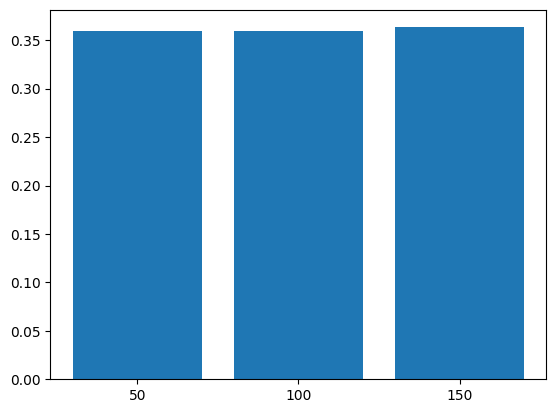

In [7]:
plt.bar(estimator_strings, f_scores)

In [ ]:
param_dist = {
    'learning_rate': scipy.stats.expon(scale=.1),
    'max_depth': [4, 8, 16],
    'n_estimators': [200, 250, 300]
}

best_params = None
best_fscore = 0.0

for params in ParameterSampler(param_dist, n_iter=4, random_state=42):

    xgb_model = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=6,
        **params
    )

    print('Started:', params)

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)
    f_score_iter = f1_score(y_test, y_pred, average="macro")

    if f_score_iter > best_fscore:
        best_fscore = f_score_iter
        best_params = params

    print('Parametrai:', params, '\nF matas:', f_score_iter)

Started: {'learning_rate': np.float64(0.04692680899768591), 'max_depth': 2, 'n_estimators': 200}
Parametrai: {'learning_rate': np.float64(0.04692680899768591), 'max_depth': 2, 'n_estimators': 200} 
F matas: 0.31222650389847595
Started: {'learning_rate': np.float64(0.13167456935454494), 'max_depth': 2, 'n_estimators': 100}
Parametrai: {'learning_rate': np.float64(0.13167456935454494), 'max_depth': 2, 'n_estimators': 100} 
F matas: 0.3680517027928036
Started: {'learning_rate': np.float64(0.01696248704623463), 'max_depth': 8, 'n_estimators': 200}
Parametrai: {'learning_rate': np.float64(0.01696248704623463), 'max_depth': 8, 'n_estimators': 200} 
F matas: 0.41102755442102135
Started: {'learning_rate': np.float64(0.005983876860868068), 'max_depth': 16, 'n_estimators': 100}


In [ ]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=6,
    **best_params
)

In [ ]:
y_pred = xgb_model.predict(X_test)

print('Accuracy:', accuracy_score( y_test, y_pred ) )
print('Recall:', recall_score( y_test, y_pred, average=None ))
print(

In [ ]:
f1_score( y_test, y_pred, average='micro' )